In [1]:
import os
current_dir = os.getcwd()  # 현재 작업 디렉토리
print(os.path.dirname(current_dir))
# print(os.path.dirname(os.path.dirname(current_dir)))
# 루트 경로 설정 (예: 프로젝트 루트 경로)
project_root = os.path.dirname(current_dir)
os.chdir(project_root)  # 루트 경로로 변경

/Users/hsh/dev_project/sb-fsts


In [2]:
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import numpy as np
import requests

실전투자 API 객체가 성공적으로 생성되었습니다.
시간: 2023-12-01 00:00:00+09:00, open_price: 72400 KRW, low_price: 71700 KRW, high_price: 72500 KRW, close_price: 72000 KRW, 볼린저 밴드 정보: 상단: 72000 KRW, 중단: 72000 KRW, 하단: 72000 KRW
윗꼬리 = 100.0, 아랫꼬리 = 300.0, body = 400.0
아랫꼬리 감지 실패: 시간: 2023-12-01 00:00:00+09:00, 사유: 종가가 시가보다 높지 않음, 하락 추세가 아님, 볼린저 밴드 하단 근처가 아님
윗꼬리 감지 실패: 시간: 2023-12-01 00:00:00+09:00, 사유: 윗꼬리가 아랫꼬리보다 짦음, 상승 추세가 아님
총 비용: 0KRW, 총 보유량: 0주, 평균 단가: 0KRW, 실현 손익 (Realized PnL): 0KRW, 미실현 손익 (Unrealized PnL): 0KRW
시간: 2023-12-04 00:00:00+09:00, open_price: 72800 KRW, low_price: 72400 KRW, high_price: 72900 KRW, close_price: 72600 KRW, 볼린저 밴드 정보: 상단: 72900 KRW, 중단: 72300 KRW, 하단: 71700 KRW
윗꼬리 = 100.0, 아랫꼬리 = 200.0, body = 200.0
아랫꼬리 감지 실패: 시간: 2023-12-04 00:00:00+09:00, 사유: 종가가 시가보다 높지 않음, 하락 추세가 아님, 볼린저 밴드 하단 근처가 아님
윗꼬리 감지 실패: 시간: 2023-12-04 00:00:00+09:00, 사유: 윗꼬리가 아랫꼬리보다 짦음
총 비용: 0KRW, 총 보유량: 0주, 평균 단가: 0KRW, 실현 손익 (Realized PnL): 0KRW, 미실현 손익 (Unrealized PnL): 0KRW
시간: 2023-12-05 00:00:00+09:00, op

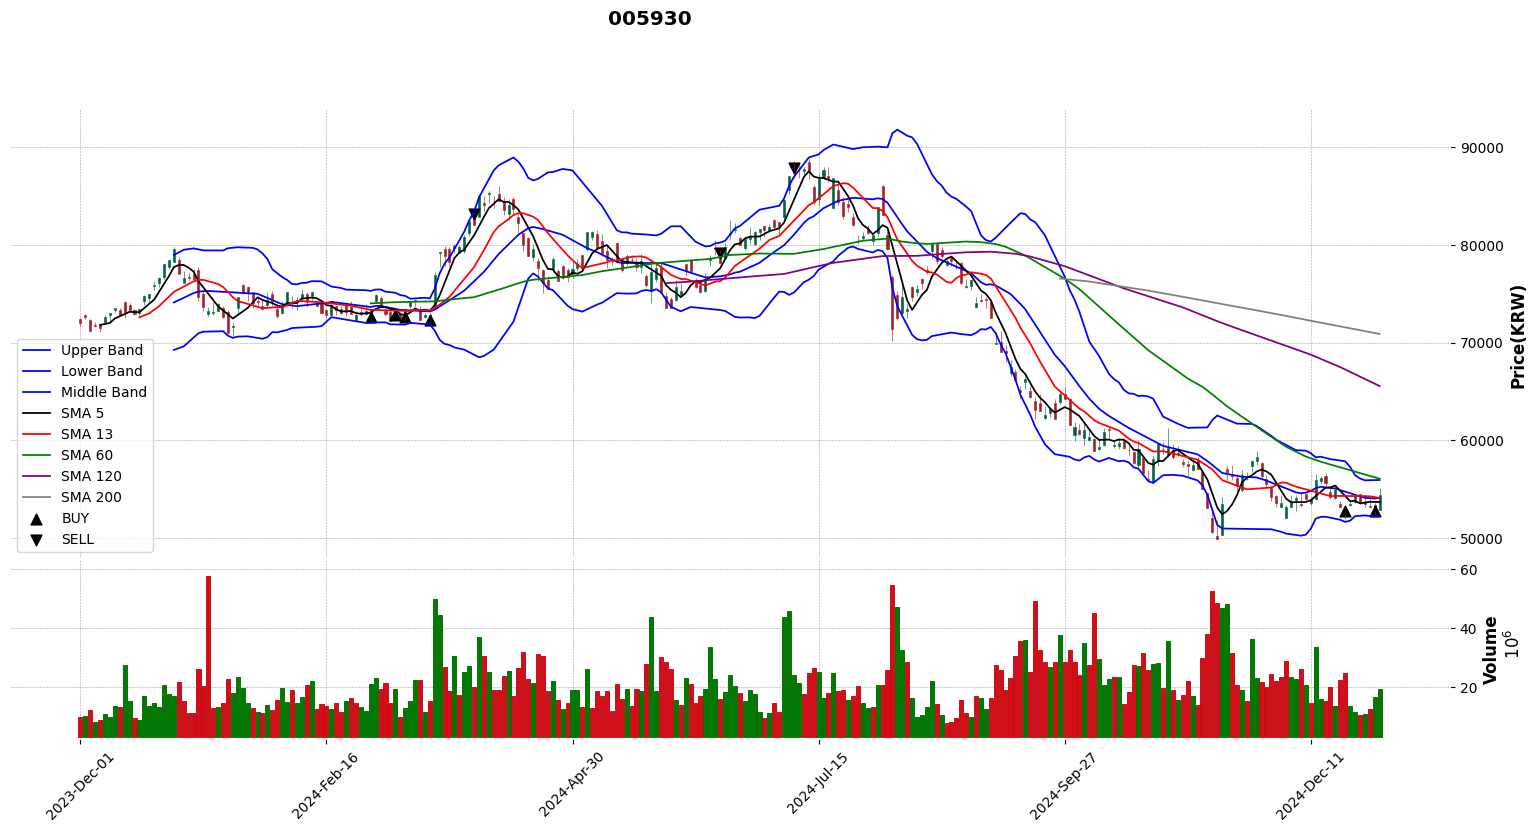

In [3]:
from app.utils.auto_trading_bot import AutoTradingBot
from datetime import date, time, timedelta


user_name = "홍석형"

auto_trading_stock = AutoTradingBot(user_name=user_name)

# symbol = '329180'
symbol = '005930'

start_date = date(2023, 12, 1)
end_date = date(2025, 1, 3)

target_trade_value_krw = 1000000  # 매수 목표 거래 금액

simulation_plot = auto_trading_stock.simulate_trading(symbol, start_date, end_date, target_trade_value_krw)

In [2]:
!conda env list

/Users/hsh/miniconda3/lib/python3.12/site-packages/conda/base/context.py:198: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
# conda environments:
#
base                     /Users/hsh/miniconda3
coupleof                 /Users/hsh/miniconda3/envs/coupleof
sb-fsts               *  /Users/hsh/miniconda3/envs/sb-fsts



In [5]:
auto_trading_stock.send_discord_webhook('테스트 메세지', 'trading')

메시지가 성공적으로 전송되었습니다.


In [9]:
auto_trading_stock._get_ohlc(symbol, start_date, end_date)

[KisDomesticDailyChartBar(time='2023-12-01T00:00:00+09:00', open=72400, close=72000, high=72500, low=71700, volume=9871284, amount=710939612000, change=-800),
 KisDomesticDailyChartBar(time='2023-12-04T00:00:00+09:00', open=72800, close=72600, high=72900, low=72400, volume=10229267, amount=743359507480, change=600),
 KisDomesticDailyChartBar(time='2023-12-05T00:00:00+09:00', open=72300, close=71200, high=72400, low=71200, volume=12129682, amount=867872449160, change=-1400),
 KisDomesticDailyChartBar(time='2023-12-06T00:00:00+09:00', open=71800, close=71700, high=72100, low=71600, volume=8123087, amount=583710472300, change=500),
 KisDomesticDailyChartBar(time='2023-12-07T00:00:00+09:00', open=71800, close=71500, high=71900, low=71100, volume=8862017, amount=633465543300, change=-200),
 KisDomesticDailyChartBar(time='2023-12-08T00:00:00+09:00', open=72100, close=72600, high=72800, low=71900, volume=10859463, amount=787230063800, change=1100),
 KisDomesticDailyChartBar(time='2023-12-11T0

In [5]:
end_date = date.today()
start_date = end_date - timedelta(days=365)

In [6]:
end_date

datetime.date(2025, 1, 2)

In [7]:
start_date

datetime.date(2024, 1, 3)